In [1]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import svm
import math
from nltk.collocations import *
from nltk import word_tokenize
from nltk.cluster import KMeansClusterer
from gensim.models import Word2Vec
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import *
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from itertools import cycle
from numpy import dot
import numpy as np
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
df_train = pd.read_csv('../data/train_set.tsv', sep='\t')

df_test = pd.read_csv('../data/test_set.tsv', sep='\t')



In [3]:
df_train

,Id,Title,Content,Category
0,1295,Business confidence dips in Japan,Business confidence among Japanese manufacture...,business
1,1108,Slowdown hits US factory growth,US industrial production increased for the 21s...,business
2,5291,Doors open at biggest gadget fair,Thousands of technology lovers and industry ex...,tech
3,2366,Bollywood DVD fraudster is jailed,A major distributor of pirated DVDs of Bollywo...,entertainment
4,5145,Musicians 'upbeat' about the net,Musicians are embracing the internet as a way ...,tech
...,...,...,...,...
1775,5215,Europe backs digital TV lifestyle,How people receive their digital entertainment...,tech
1776,2024,Paraguay novel wins US book prize,A novel set in 19th century Paraguay has won t...,entertainment
1777,2081,Oscars race enters final furlong,The race for the Oscars entered its final stag...,entertainment
1778,4127,Kewell waits as injury drags on,Liverpool winger Harry Kewell is struggling to...,sport


# Wordclouds

In [ ]:
cat_df = df_train.groupby('Category')['Content'].apply(lambda x: ''.join(x))


In [ ]:
text = cat_df['business']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['entertainment']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['politics']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['sport']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = cat_df['tech']

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Classification

*Tokenization of all articles' content, to use in classification methods*

#### *Using Bag of Words*

In [7]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words= STOPWORDS)

In [8]:
train_tokens = df_train.Content.values
X = vectorizer.fit_transform(train_tokens)
X = X.toarray()

In [9]:
test_tokens = df_test.Content.values
X_test = vectorizer.transform(test_tokens)
X_test = X_test.toarray()

#### *Using TF_IDF*

In [10]:
vectorizer2 = TfidfVectorizer(ngram_range=(1,2), stop_words= STOPWORDS)
Z = vectorizer2.fit_transform(train_tokens)
Z = Z.toarray()

In [11]:
Z_test = vectorizer2.transform(test_tokens)
Z_test = Z_test.toarray()

#### *Preparation for cross validation of each classifier*

In [12]:
train_categories = df_train.Category.values
test_categories = df_test.Category.values

In [13]:
score_metrics = ['f1_macro', 'precision_macro','recall_macro', 'accuracy']

In [14]:
labels = ['business','entertainment', 'politics', 'sport', 'tech']
y_train = label_binarize(train_categories, classes = labels)
y_test = label_binarize(test_categories, classes = labels)

## *Classification Method:* Support Vector Machine

#### Applying on X (BoW)

In [12]:
clf_bow = svm.SVC(kernel = 'linear', c = 1)
clf_bow.fit(X, y = train_categories)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

*Cross Validation*

In [13]:
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(clf_bow, X_test, test_categories, cv = 10, n_jobs=4, scoring=score_metrics)
results

{'fit_time': array([7.4833374 , 7.55108404, 7.63178205, 7.45317435, 9.03874183,
        9.20459723, 9.15972948, 9.23107147, 7.38458276, 7.26377606]),
 'score_time': array([0.61734247, 0.64153314, 0.67868161, 0.62491107, 0.85350156,
        0.84693956, 0.83278441, 0.79791546, 0.56174684, 0.55210423]),
 'test_f1_macro': array([0.7569852 , 0.82389906, 0.88188406, 0.79566434, 0.73729604,
        0.88688645, 0.78724638, 0.76528559, 0.90642857, 0.80285227]),
 'test_precision_macro': array([0.83687424, 0.89946524, 0.91217949, 0.83809524, 0.82634615,
        0.92848485, 0.85384615, 0.80810301, 0.91006494, 0.82987568]),
 'test_recall_macro': array([0.76333333, 0.80833333, 0.8734127 , 0.78578644, 0.73681818,
        0.875     , 0.78611111, 0.765     , 0.905     , 0.81      ]),
 'test_accuracy': array([0.77777778, 0.82222222, 0.88888889, 0.8       , 0.75555556,
        0.88888889, 0.8       , 0.77272727, 0.90909091, 0.81818182])}

In [27]:
classifier = OneVsRestClassifier(svm.SVC(probability=True))
y_score = classifier.fit(X, train_categories).decision_function(X_test)

In [15]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

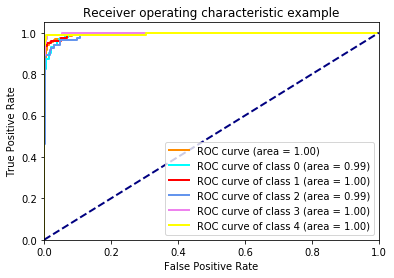

In [16]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Applying on Z (TF-IDF)

In [26]:
clf_tfidf = svm.SVC(kernel = 'linear', c = 1)
clf_tfidf.fit(Z, y = train_categories)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

*Cross Validation*

In [27]:
results = cross_validate(clf_tfidf, Z_test, test_categories, cv = 10, n_jobs=4, scoring=score_metrics)
results

{'fit_time': array([9.17741799, 9.17567062, 9.17174625, 9.14608073, 9.11439824,
        9.08567309, 9.09037781, 9.18766212, 8.71117997, 8.69989181]),
 'score_time': array([0.62684584, 0.62015653, 0.61796689, 0.61689496, 0.77253485,
        0.76916599, 0.76864552, 0.76612592, 0.60327554, 0.60123682]),
 'test_f1_macro': array([0.95515152, 0.93357691, 0.95306259, 0.93347339, 0.95515152,
        0.90717949, 0.95672014, 0.88720779, 0.93200828, 0.90839827]),
 'test_precision_macro': array([0.96666667, 0.95384615, 0.96515152, 0.95104895, 0.96666667,
        0.94285714, 0.96666667, 0.90681818, 0.95384615, 0.93333333]),
 'test_recall_macro': array([0.95      , 0.92777778, 0.94642857, 0.92777778, 0.95      ,
        0.9       , 0.95277778, 0.88      , 0.925     , 0.9       ]),
 'test_accuracy': array([0.95555556, 0.93333333, 0.95555556, 0.93333333, 0.95555556,
        0.91111111, 0.95555556, 0.88636364, 0.93181818, 0.90909091])}

In [28]:
classifier = OneVsRestClassifier(svm.SVC(probability=True))
# cross_validate(classifier, X_test, y_test, cv = 10, n_jobs=4, scoring='roc_auc')  # not sure if this line is useful anymore
y_score = classifier.fit(Z, train_categories).decision_function(Z_test)

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

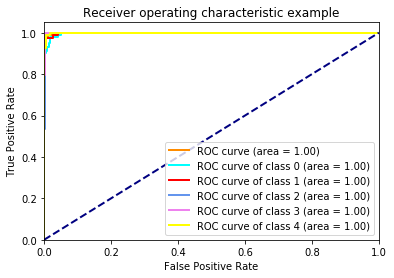

In [30]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## *Classification Method:* Random Forests

#### Applying on X (BoW)

In [51]:
forest_bow = RandomForestClassifier(n_jobs=4)
forest_bow.fit(X, y = train_categories)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

*Cross Validation*

In [39]:
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(forest_bow, X_test, test_categories, cv = 10, n_jobs=4, scoring=score_metrics)
results

{'fit_time': array([1.83796883, 1.82340384, 1.77806163, 1.89415455, 1.52424812,
        1.66969967, 1.5775373 , 1.57552361, 0.93680334, 0.90075278]),
 'score_time': array([0.13098574, 0.12694407, 0.14609361, 0.13280964, 0.14552546,
        0.12314391, 0.12612009, 0.1115303 , 0.10659599, 0.1113143 ]),
 'test_f1_macro': array([0.95014006, 0.91272257, 0.90621777, 0.91099383, 0.97871148,
        0.93121777, 0.91272257, 0.92915622, 0.97714286, 0.955     ]),
 'test_precision_macro': array([0.95959596, 0.93566434, 0.92142857, 0.91681818, 0.97777778,
        0.95      , 0.93566434, 0.94181818, 0.98181818, 0.955     ]),
 'test_recall_macro': array([0.95      , 0.90555556, 0.90198413, 0.91006494, 0.98181818,
        0.925     , 0.90555556, 0.93      , 0.975     , 0.955     ]),
 'test_accuracy': array([0.95555556, 0.91111111, 0.91111111, 0.91111111, 0.97777778,
        0.93333333, 0.91111111, 0.93181818, 0.97727273, 0.95454545])}

In [52]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
classifier = OneVsRestClassifier(forest_bow)
# cross_validate(classifier, X_test, y_test, cv = 10, n_jobs=4, scoring='roc_auc')  # not sure if this line is useful anymore
forest_bow_y_score = classifier.fit(X, train_categories).predict_proba(X_test)

In [54]:
forest_bow_y_score

array([[0.04166667, 0.02083333, 0.875     , 0.04166667, 0.02083333],
       [0.09259259, 0.5       , 0.14814815, 0.24074074, 0.01851852],
       [0.71568627, 0.04901961, 0.08823529, 0.08823529, 0.05882353],
       ...,
       [0.87692308, 0.04615385, 0.03076923, 0.04615385, 0.        ],
       [0.43478261, 0.        , 0.36956522, 0.01086957, 0.18478261],
       [0.12987013, 0.67532468, 0.        , 0.14285714, 0.05194805]])

In [55]:
forest_bow_fpr = dict()
forest_bow_tpr = dict()
forest_bow_roc_auc = dict()
for i in range(5):
    forest_bow_fpr[i], forest_bow_tpr[i], _ = roc_curve(y_test[:,i],forest_bow_y_score[:,i])
    forest_bow_roc_auc[i] = auc(forest_bow_fpr[i], forest_bow_tpr[i])

forest_bow_fpr["micro"], forest_bow_tpr["micro"], _ = roc_curve(y_test.ravel(), forest_bow_y_score.ravel())
forest_bow_roc_auc["micro"] = auc(forest_bow_fpr["micro"], forest_bow_tpr["micro"])    

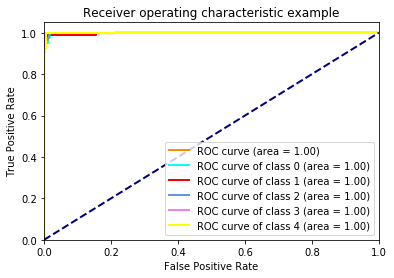

In [56]:
plt.figure()
lw = 2
plt.plot(forest_bow_fpr['micro'], forest_bow_tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % forest_bow_roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(forest_bow_fpr[i], forest_bow_tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, forest_bow_roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Applying on Z (TF-IDF)

In [20]:
forest_tf_idf = RandomForestClassifier(max_depth=5,n_jobs=4)
forest_tf_idf.fit(Z, y = train_categories)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

*Cross Validation*

In [21]:
# sc = make_scorer(sklearn.metrics.accuracy_score)
results = cross_validate(forest_tf_idf, Z_test, test_categories, cv = 10, n_jobs=4, scoring=score_metrics)
results

{'fit_time': array([5.23616266, 5.09781766, 5.30073237, 5.76549053, 2.87753129,
        2.65122843, 1.79261994, 2.9876554 , 1.88873768, 1.56908798]),
 'score_time': array([0.17466164, 0.2134347 , 0.16335654, 0.20868444, 0.18128276,
        0.26897717, 0.20129371, 0.17922688, 0.16976309, 0.14289188]),
 'test_f1_macro': array([0.78266116, 0.7610323 , 0.74148962, 0.80292061, 0.83224362,
        0.83762904, 0.80409091, 0.78658009, 0.83200828, 0.77861472]),
 'test_precision_macro': array([0.87884615, 0.86785714, 0.87166667, 0.88952381, 0.92222222,
        0.89666667, 0.88571429, 0.8452381 , 0.8967033 , 0.87619048]),
 'test_recall_macro': array([0.77777778, 0.75833333, 0.74325397, 0.79206349, 0.825     ,
        0.83      , 0.80555556, 0.78      , 0.825     , 0.775     ]),
 'test_accuracy': array([0.8       , 0.77777778, 0.77777778, 0.82222222, 0.84444444,
        0.84444444, 0.82222222, 0.79545455, 0.84090909, 0.79545455])}

In [22]:
classifier = OneVsRestClassifier(forest_tf_idf)
# cross_validate(classifier, X_test, y_test, cv = 10, n_jobs=4, scoring='roc_auc')  # not sure if this line is useful anymore
y_score = classifier.fit(Z, train_categories).predict_proba(Z_test)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

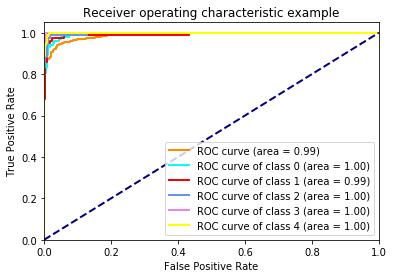

In [24]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## *Classification Method:* Naive Bayes
### *Multinomial NB*

#### Applying on X (BoW)

In [84]:
nb_bow = MultinomialNB()
nb_bow.fit(X, y = train_categories)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

*Cross Validation*

In [85]:
results = cross_validate(estimator = nb_bow, X = X_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs = 6)
results

{'fit_time': array([0.15563655, 0.27274442, 0.26440287, 0.16228294, 0.25472116,
        0.16963863, 0.22582388, 0.18302608, 0.15611386, 0.13182878]),
 'score_time': array([0.04181576, 0.03587866, 0.02072334, 0.05662775, 0.05209374,
        0.04151464, 0.00485587, 0.00465512, 0.00432515, 0.00395775]),
 'test_f1_macro': array([0.97770898, 0.94913755, 0.97408907, 0.97871148, 0.93055556,
        0.97490196, 0.91284271, 0.83226721, 0.92691533, 0.92079293]),
 'test_precision_macro': array([0.97777778, 0.95777778, 0.98      , 0.97777778, 0.935     ,
        0.97777778, 0.93846154, 0.87878788, 0.93777778, 0.93737374]),
 'test_recall_macro': array([0.98      , 0.95      , 0.97142857, 0.98181818, 0.935     ,
        0.975     , 0.91      , 0.845     , 0.93      , 0.925     ]),
 'test_accuracy': array([0.97777778, 0.95555556, 0.97777778, 0.97777778, 0.93333333,
        0.97777778, 0.91111111, 0.84090909, 0.93181818, 0.93181818])}

In [95]:
classifier = OneVsRestClassifier(nb_bow)
y_score = classifier.fit(X, train_categories).predict_proba(X_test)

In [96]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

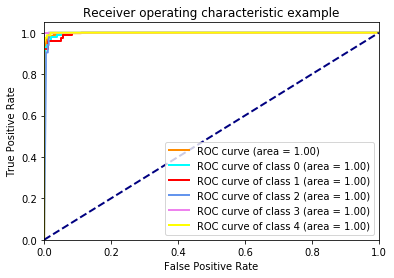

In [97]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Applying on Z (TF-IDF)

In [98]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(Z, y = train_categories)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

*Cross Validation*

In [99]:
results = cross_validate(estimator = nb_tfidf, X = Z_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs = 6)
results

{'fit_time': array([0.13068032, 0.09797668, 0.09720922, 0.13205004, 0.12514496,
        0.12334585, 0.07389975, 0.07373142, 0.0629766 , 0.06287432]),
 'score_time': array([0.00839114, 0.00457764, 0.00483799, 0.00640702, 0.00898528,
        0.00864959, 0.00342941, 0.00344801, 0.00294971, 0.00300193]),
 'test_f1_macro': array([0.93038961, 0.97714286, 0.95306259, 0.93263988, 0.97490196,
        0.97714286, 0.93233083, 0.8554568 , 0.93038961, 0.8916221 ]),
 'test_precision_macro': array([0.94848485, 0.98181818, 0.96515152, 0.95      , 0.97777778,
        0.98181818, 0.94363636, 0.8760101 , 0.94848485, 0.92222222]),
 'test_recall_macro': array([0.925     , 0.975     , 0.94642857, 0.92420635, 0.975     ,
        0.975     , 0.93      , 0.855     , 0.925     , 0.9       ]),
 'test_accuracy': array([0.93333333, 0.97777778, 0.95555556, 0.93333333, 0.97777778,
        0.97777778, 0.93333333, 0.86363636, 0.93181818, 0.90909091])}

In [100]:
classifier = OneVsRestClassifier(nb_tfidf)
y_score = nb_tfidf.fit(Z, train_categories).predict_proba(Z_test)
y_score

array([[0.20650876, 0.03105121, 0.68800013, 0.04135945, 0.03308045],
       [0.08034511, 0.71080269, 0.04805172, 0.10779716, 0.05300332],
       [0.52794132, 0.0305447 , 0.14692193, 0.15061683, 0.14397522],
       ...,
       [0.74419092, 0.05292314, 0.07004752, 0.07129676, 0.06154166],
       [0.36043812, 0.0351297 , 0.47499916, 0.06170116, 0.06773186],
       [0.07142995, 0.84229617, 0.01845164, 0.03907412, 0.02874811]])

In [101]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

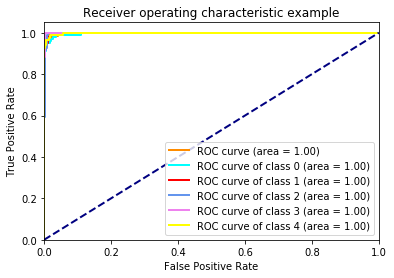

In [102]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## *Classification Method:* K-Nearest Neighbors
#### *A custom implementation from scratch, without using sklearn.neighbors methods.*

### Creating the class

In [143]:
from math import sqrt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.base import BaseEstimator
class KNN(BaseEstimator):
    
# calculate the Euclidean distance between two vectors

    def __init__(self,n_neighbours):
        self.n_neighbours = n_neighbours
        self.train = []


    def distance(self, row1, row2):
        dist = 0.0
        for i in range(len(row1)-1):
            dist += (np.array(row1[i]) - np.array(row2[i]))**2
        return sqrt(dist)

   
    def fit(self, X, y, kwargs = None):
        if X.shape[0] != y.shape[0]:
            raise ValueError
        
        self.train = list(zip(X,y))   

        return self


    def predict(self, X):
        predictions = []

        rows = [row[0] for row in self.train]

        distances = euclidean_distances(X, rows)

        neighbours = np.argsort(distances, axis = 1)

        for i in range(neighbours.shape[0]):
            k_neighbours = neighbours[i][:self.n_neighbours]
            output_values = []
            for neigh in k_neighbours:
                output_values.append(self.train[neigh][1])

            predictions.append(max(set(output_values), key=output_values.count))

        return np.array(predictions)


    def decision_function(self, X):
        all_labels = {'business','entertainment', 'politics', 'sport', 'tech'}

        rows = [row[0] for row in self.train]

        distances = euclidean_distances(X, rows)

        neigh_dist = [{} for row in range(X.shape[0])]

        neighbours = np.argsort(distances, axis = 1)

        for i in range(neighbours.shape[0]):
            k_neighbours = neighbours[i][:self.n_neighbours]
            output_values = []
            for neigh in k_neighbours:
                output_values.append((self.train[neigh][1], distances[i][neigh]))
                out_labels = []

                for value in output_values:
                    out_labels.append(value[0])
                    if value[0] not in neigh_dist[i].keys():
                        neigh_dist[i][value[0]] = value[1]
                    else:
                        neigh_dist[i][value[0]] += value[1]
                
                for value in output_values:
                    neigh_dist[i][value[0]] = neigh_dist[i][value[0]] / out_labels.count(value[0])

                remaining_labels = all_labels - set(out_labels)

                remaining_neighbours = neighbours[i][self.n_neighbours:]

                if len(remaining_labels) != 0:
                    for neigh in remaining_neighbours:
                        if self.train[neigh][1] in remaining_labels:
                            neigh_dist[i][self.train[neigh][1]] = distances[i][neigh]
                            remaining_labels.remove(self.train[neigh][1])
                            if len(remaining_labels) == 0:
                                break

        neigh_dist_list = [row.items() for row in neigh_dist]

        final_dist = []

        for row in neigh_dist_list:
            final_dist.append(list(sorted(row, key=lambda x:x[0])))

        # print(final_dist)

        decision = []

        for row in final_dist:
            tuple_items = [t[1] for t in row]
            decision.append(tuple_items)
        

        return -np.array(decision)


#### Applying on Z (TF-IDF)

In [26]:
knn = KNN(3)

knn.fit(Z, train_categories)

KNN(n_neighbours=3)

*Cross Validation*

In [36]:
results = cross_validate(estimator = knn, X = Z_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs=4)
results

{'fit_time': array([0.8357625 , 0.78598833, 0.77924013, 1.04270744, 1.30220294,
        1.29142904, 1.28509259, 0.8680656 , 0.79623795, 0.34609222]),
 'score_time': array([4.64510155, 4.65284276, 4.69779873, 4.83091521, 2.66249132,
        2.7291162 , 1.94344211, 2.51354599, 0.82664323, 0.78169346]),
 'test_f1_macro': array([0.96052967, 0.97894737, 0.95994872, 0.92972543, 0.90772765,
        0.79352666, 0.92814871, 0.90141414, 0.95952716, 0.94720178]),
 'test_precision_macro': array([0.96363636, 0.98      , 0.96794872, 0.93324675, 0.90833333,
        0.81238095, 0.92420635, 0.93846154, 0.96666667, 0.9547619 ]),
 'test_recall_macro': array([0.95959596, 0.98      , 0.9547619 , 0.93310023, 0.91459596,
        0.83333333, 0.93809524, 0.89333333, 0.95777778, 0.94642857]),
 'test_accuracy': array([0.95555556, 0.97777778, 0.95555556, 0.93333333, 0.91111111,
        0.82222222, 0.93333333, 0.90909091, 0.95454545, 0.95454545])}

In [37]:
classifier = OneVsRestClassifier(knn)
y_score = knn.fit(Z, train_categories).decision_function(Z_test)
y_score

array([[-1.36543702, -1.38843698, -0.17784629, -1.38676305, -1.36237071],
       [-4.07265382, -1.34829201, -1.38140869, -1.38906171, -1.38694392],
       [-0.1914372 , -1.38631638, -1.39421537, -1.39439454, -1.38562672],
       ...,
       [-0.18679274, -1.38829995, -1.38638596, -1.37430958, -1.38743373],
       [-1.37740026, -1.36337319, -0.18224209, -1.38595742, -1.36412506],
       [-1.3747827 , -0.18335084, -1.38464777, -1.38027189, -1.37658087]])

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

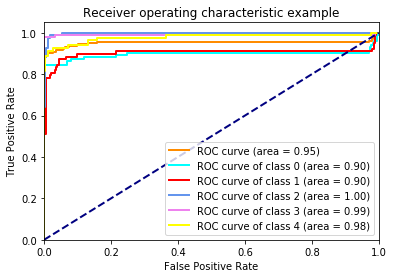

In [39]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Applying on X (BoW)

In [144]:
knn_bow = KNN(3)

knn_bow.fit(X, train_categories)

KNN(n_neighbours=3)

*Cross Validation*

In [145]:
results = cross_validate(estimator = knn_bow, X = X_test, y = test_categories, scoring = score_metrics, cv = 10, n_jobs=4)
results

{'fit_time': array([0.04596329, 0.15772033, 0.14092565, 0.09220123, 0.06983304,
        0.06337261, 0.11945367, 0.10164857, 0.07808447, 0.10834432]),
 'score_time': array([0.38832021, 0.40838528, 0.39805341, 0.36378765, 0.35431695,
        0.32656121, 0.37206745, 0.29473305, 0.26796722, 0.2316761 ]),
 'test_f1_macro': array([0.45042735, 0.46231884, 0.52790905, 0.54564103, 0.39994949,
        0.40410225, 0.47      , 0.64761905, 0.34146433, 0.45117647]),
 'test_precision_macro': array([0.85714286, 0.86285714, 0.82      , 0.83142857, 0.85945946,
        0.67222222, 0.86470588, 0.88571429, 0.84864865, 0.85      ]),
 'test_recall_macro': array([0.45858586, 0.44      , 0.55238095, 0.53986014, 0.3915873 ,
        0.39880952, 0.45238095, 0.59904762, 0.35777778, 0.454329  ]),
 'test_accuracy': array([0.44444444, 0.46666667, 0.48888889, 0.51111111, 0.42222222,
        0.48888889, 0.48888889, 0.63636364, 0.36363636, 0.45454545])}

In [146]:
classifier = OneVsRestClassifier(knn_bow)
y_score = knn_bow.fit(X, train_categories).decision_function(X_test)
y_score

array([[-19.10497317, -19.33907961,  -2.42246967, -18.734994  ,
        -20.73644135],
       [-17.40689519, -17.66352173, -52.28995562, -16.9775419 ,
        -19.59591794],
       [-23.21637353, -23.32380758, -69.3749048 , -22.81427266,
        -24.61706725],
       ...,
       [-14.6628783 , -15.19868415, -41.1339276 , -14.36120998,
        -17.17556404],
       [-40.04947064, -20.1246118 , -59.01694672, -59.64880383,
        -21.81742423],
       [-21.42428529, -62.42595614, -43.39528039, -63.40290664,
        -22.75961335]])

In [147]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

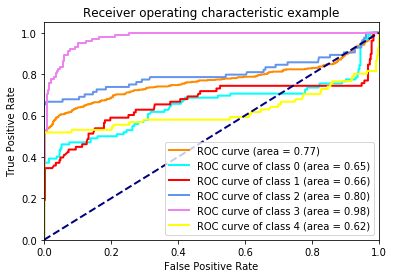

In [148]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

colors = cycle(['aqua', 'red', 'cornflowerblue', 'violet', 'yellow'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Clustering

In [15]:
model = gensim.models.KeyedVectors.load_word2vec_format('../../GoogleNews-vectors-negative300.bin', binary=True)  

In [16]:
X_cluster_train = df_train.Content.values

In [17]:
maps = dict(zip(labels, range(0,5)))
maps

def color_map(strings, colors):
    final = []
    for string in strings:
        final.append(colors[string])
    return final

train_colors = color_map(train_categories, maps)
train_colors[:10]

[0, 0, 4, 1, 4, 3, 1, 1, 1, 4]

### Clustering with document embeddings

In [86]:
doc_embeddings = []
for document in X_cluster_train:
    avg_matrix = np.zeros(300)
    text = ''.join(document)
    tokens = word_tokenize(text)
    tokens = list(filter( lambda x: (x in model.vocab.keys()), tokens))
    for token in tokens:
        avg_matrix += model[token]
    avg_matrix /= len(tokens)
    doc_embeddings.append(avg_matrix)

doc_embeddings = np.array(doc_embeddings)

In [87]:
pca_de = PCA(n_components=2, whiten=True)
result_de = pca_de.fit_transform(doc_embeddings)

In [88]:
kclusterer_de = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters_de = kclusterer_de.cluster(result_de, assign_clusters=True)

In [89]:
means_de = np.array(kclusterer_de.means())

In [90]:
train_clusters = list(zip(train_colors, assigned_clusters_de))
pairs = {}
for i in range(0,5):
    for j in range(0,5):
        pairs[(i,j)] = train_clusters.count((i,j))
pairs = pairs.items()
pairs = sorted(pairs, key = lambda x: x[0][0])

final =[]
for i in range(0,5):
    groups = filter(lambda x: x[0][0] == i, pairs)
    final.append(max(groups, key = lambda x: x[1]))
final = [x[0] for x in final]
final = dict(final)

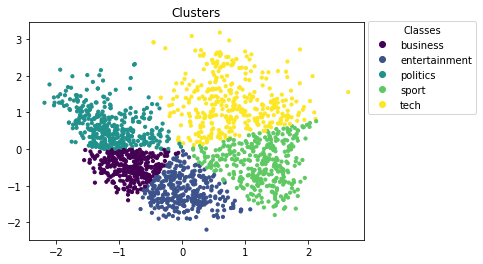

In [114]:
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_de[:, 0], result_de[:, 1], c = assigned_clusters_de, s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(bbox_to_anchor = (1.35, 1.03), handles = handles, labels = labels, loc="upper right", title="Classes")
plt.title('Clusters')
plt.show()

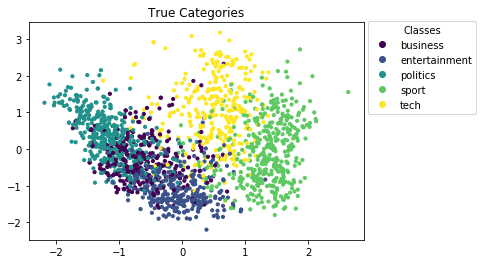

In [113]:
temp_colors = [final[i] for i in train_colors]
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_de[:, 0], result_de[:, 1], c = temp_colors, s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(bbox_to_anchor = (1.35, 1.03), handles = handles, labels = labels, loc="upper right", title="Classes")
plt.title('True Categories')
plt.show()

### Clustering with X (BoW)

In [18]:
pca_bow = PCA(n_components=2, whiten=True)
result_bow = pca_bow.fit_transform(X)

In [19]:
kclusterer_bow = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters_bow = kclusterer_bow.cluster(result_bow, assign_clusters=True)

In [20]:
means_bow = np.array(kclusterer_bow.means())

In [69]:
train_clusters = list(zip(train_colors, assigned_clusters_bow))
pairs = {}
for i in range(0,5):
    for j in range(0,5):
        pairs[(i,j)] = train_clusters.count((i,j))
pairs = pairs.items()
pairs = sorted(pairs, key = lambda x: x[0][0])

final =[]
for i in range(0,5):
    groups = filter(lambda x: x[0][0] == i, pairs)
    final.append(max(groups, key = lambda x: x[1]))
final = [x[0] for x in final]
final = dict(final)
final[0] = 0
final[3] = 3
final

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

$\mathdefault{0}$ $\mathdefault{1}$ $\mathdefault{2}$ $\mathdefault{3}$ $\mathdefault{4}$


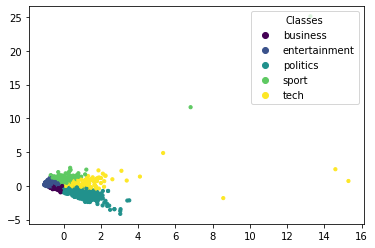

In [59]:
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_bow[:, 0], result_bow[:, 1], c = assigned_clusters_bow[:], s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(handles, labels,loc="upper right", title="Classes")
plt.title('Clusters')
plt.show()

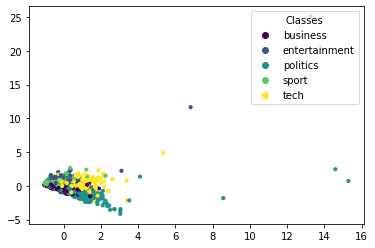

In [71]:
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_bow[:, 0], result_bow[:, 1], c = train_colors, s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(handles, labels,loc="upper right", title="Classes")

### Clustering with Z (TF-IDF)

In [73]:
pca_tf_idf = PCA(n_components=2, whiten=True)
result_tf_idf = pca_tf_idf.fit_transform(Z)

In [74]:
kclusterer_tf_idf = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters_tf_idf = kclusterer_tf_idf.cluster(result_tf_idf, assign_clusters=True)

In [75]:
means_tf_idf = np.array(kclusterer_tf_idf.means())

In [83]:
train_clusters = list(zip(train_colors, assigned_clusters_tf_idf))
pairs = {}
for i in range(0,5):
    for j in range(0,5):
        pairs[(i,j)] = train_clusters.count((i,j))
pairs = pairs.items()
pairs = sorted(pairs, key = lambda x: x[0][0])

final =[]
for i in range(0,5):
    groups = filter(lambda x: x[0][0] == i, pairs)
    final.append(max(groups, key = lambda x: x[1]))
final = [x[0] for x in final]
final = dict(final)
final[4] = 1
final

{0: 0, 1: 2, 2: 4, 3: 3, 4: 1}

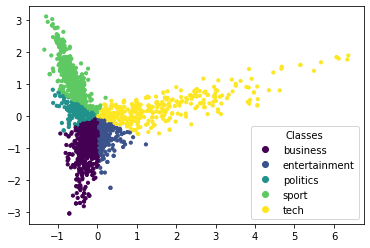

In [64]:
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_tf_idf[:, 0], result_tf_idf[:, 1], c = assigned_clusters_tf_idf, s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(handles, labels,loc="lower right", title="Classes")
plt.title('Clusters')
plt.show()

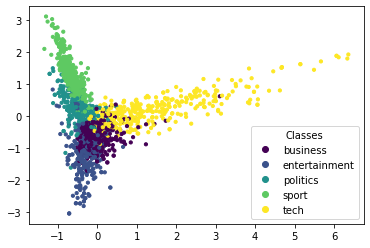

In [84]:
temp_colors = [final[i] for i in train_colors]
classes = ('business', 'entertainment', 'politics', 'sport','tech')
_, ax = plt.subplots()
scat = ax.scatter(result_tf_idf[:, 0], result_tf_idf[:, 1], c = temp_colors, s = 10)
handles, labels = (scat.legend_elements()[0], classes)
legend = ax.legend(handles, labels,loc="lower right", title="Classes")
plt.title('True Categories')
plt.show()